## Feature Engineering

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')

In [6]:
sales_train = pd.read_csv("sales_train.csv")
sales_test = pd.read_csv("test.csv")
shops = pd.read_csv("shops.csv")
items = pd.read_csv("items.csv")
item_categories = pd.read_csv("item_categories.csv")
sample_submission = pd.read_csv("sample_submission.csv")

## Process items:

In [7]:
df_items = items.merge(item_categories, how='left', left_on='item_category_id', right_on='item_category_id')

## Process shops:

In [8]:
df_shops = shops.copy()
df_shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


We can see that [0, 57], [1, 58], [10, 11] and [19, 40] are the same shop.

In [9]:
def extract_city_name(shop_name):
    city = shop_name.split()[0]
    if city in ['Цифровой', 'Интернет-магазин']:
        city = 'Online'
    elif city[0] == '!':
        city = city[1:]
    return city

In [10]:
df_shops['city'] = df_shops['shop_name'].apply(extract_city_name)
df_shops['city'] = LabelEncoder().fit_transform(df_shops['city'])

In [11]:
df_shops.city.unique()

array([28,  1,  2,  3,  4,  5,  6,  7,  0,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [12]:
len(df_shops.city.unique())

30

There are 30 cities.

## Process train and test dataset:

In [117]:
df_train = sales_train.copy()
df_test = sales_test.copy()

In [118]:
# data cleaning
df_train = df_train[df_train['item_cnt_day'] > 0]
df_train = df_train[df_train['item_cnt_day'] < 1000]
df_train = df_train[df_train['item_price'] < 50000]
df_train = df_train[df_train['item_price'] > 0]

In [119]:
# change same shop
df_train.loc[df_train.shop_id == 57, ['shop_id']] = 0
df_train.loc[df_train.shop_id == 58, ['shop_id']] = 1
df_train.loc[df_train.shop_id == 11, ['shop_id']] = 10
df_train.loc[df_train.shop_id == 40, ['shop_id']] = 39

df_test.loc[df_test.shop_id == 57, ['shop_id']] = 0
df_test.loc[df_test.shop_id == 58, ['shop_id']] = 1
df_test.loc[df_test.shop_id == 11, ['shop_id']] = 10
df_test.loc[df_test.shop_id == 40, ['shop_id']] = 39

In [120]:
sales_test.loc[sales_test.shop_id == 57, ['shop_id']] = 0
sales_test.loc[sales_test.shop_id == 58, ['shop_id']] = 1
sales_test.loc[sales_test.shop_id == 11, ['shop_id']] = 10
sales_test.loc[sales_test.shop_id == 40, ['shop_id']] = 39

In [121]:
# delete unrelated information
do_not_need = set(df_train.shop_id) - set(df_test.shop_id)
do_not_need

{8, 9, 13, 17, 20, 23, 27, 29, 30, 32, 33, 43, 51, 54}

Since these shop do not occur in the test dataset, thus we do not need information about these shops.

In [122]:
index = [shop not in do_not_need for shop in df_train.shop_id]
df_train = df_train[index]

In [123]:
df_test['date_block_num'] = 34
df_test['item_cnt_month'] = 0.

In [124]:
item_average_price = df_train.groupby(['item_id']).mean().reset_index()
item_average_price = item_average_price.drop(columns=['date_block_num', 'shop_id', 'item_cnt_day'])
item_average_price = item_average_price.rename(columns={'item_price': 'item_average_price'})

In [125]:
df_test = df_test.merge(item_average_price, how='left')
df_train = df_train.merge(item_average_price, how='left')

In [126]:
item_monthly_average_price = df_train.groupby(['item_id', 'date_block_num']).mean().reset_index()
item_monthly_average_price = item_monthly_average_price.drop(columns=['shop_id', 'item_cnt_day', 'item_average_price'])
item_monthly_average_price = item_monthly_average_price.rename(columns={'item_price': 'item_monthly_average_price'})

In [127]:
df_train = df_train.merge(item_monthly_average_price, how='left')

In [128]:
item_average_price_per_shop = df_train.groupby(['item_id', 'shop_id']).mean().reset_index()
item_average_price_per_shop = item_average_price_per_shop.drop(columns=['date_block_num', 'item_cnt_day', 'item_average_price', 'item_monthly_average_price'])
item_average_price_per_shop = item_average_price_per_shop.rename(columns={'item_price': 'item_average_price_per_shop'})

In [129]:
df_test = df_test.merge(item_average_price_per_shop, how='left')
df_train = df_train.merge(item_average_price_per_shop, how='left')

In [130]:
# remove abnormal data of train dataset
df_train = df_train.drop(columns=['date'])
df_train = df_train.drop_duplicates()

In [131]:
item_cnt_month = df_train.groupby(['item_id', 'shop_id', 'date_block_num']).sum().reset_index()
item_cnt_month = item_cnt_month.rename(columns={'item_cnt_day': 'item_cnt_month'})
item_cnt_month = item_cnt_month.drop(columns=['item_average_price', 'item_monthly_average_price', 'item_average_price_per_shop', 'item_price'])

In [132]:
df_train = df_train.merge(item_cnt_month, how='left')
df_train = df_train.drop(columns=['item_price', 'item_cnt_day'])
df_train = df_train.drop_duplicates()

In [133]:
df_test = df_test.drop(columns=['ID'])
df_test['item_monthly_average_price'] = np.NaN

Merge train and test dataset:

In [134]:
train_test = pd.concat([df_train, df_test])
train_test = train_test.merge(df_shops[['shop_id', 'city']], how='left')
train_test = train_test.merge(df_items[['item_id', 'item_category_id']], how='left')

Mean monthly number of products sold by city and item:

In [135]:
item_monthly_average_sales_per_city = train_test.groupby(['date_block_num', 'item_id', 'city']).mean().reset_index().rename(columns={'item_cnt_month': 'item_monthly_average_sales_per_city'})
train_test = train_test.merge(item_monthly_average_sales_per_city[['date_block_num', 'item_id', 'city', 'item_monthly_average_sales_per_city']], how='left')

Mean monthly number of products sold by shop and item_category:

In [136]:
item_category_monthly_average_sales_per_shop = train_test.groupby(['date_block_num', 'shop_id', 'item_category_id']).mean().reset_index().rename(columns={'item_cnt_month': 'item_category_monthly_average_sales_per_shop'})
train_test = train_test.merge(item_category_monthly_average_sales_per_shop[['date_block_num', 'shop_id', 'item_category_id', 'item_category_monthly_average_sales_per_shop']], how='left')

Mean monthly number of products sold by item:

In [137]:
item_monthly_average_sales = train_test.groupby(['date_block_num', 'item_id']).mean().reset_index().rename(columns={'item_cnt_month': 'item_monthly_average_sales'})
train_test = train_test.merge(item_monthly_average_sales[['date_block_num', 'item_id', 'item_monthly_average_sales']], how='left')

Mean number of products sold by item:

In [138]:
item_average_sales = train_test.groupby(['item_id']).mean().reset_index().rename(columns={'item_cnt_month': 'item_average_sales'})
train_test = train_test.merge(item_average_sales[['item_id', 'item_average_sales']], how='left')

Mean number of products sold by shop:

In [139]:
shop_average_sales = train_test.groupby(['shop_id']).mean().reset_index().rename(columns={'item_cnt_month': 'shop_average_sales'})
train_test = train_test.merge(shop_average_sales[['shop_id', 'shop_average_sales']], how='left')

Mean number of products sold by city:

In [140]:
city_average_sales = train_test.groupby(['city']).mean().reset_index().rename(columns={'item_cnt_month': 'city_average_sales'})
train_test = train_test.merge(city_average_sales[['city', 'city_average_sales']], how='left')

Mean number of products sold by category:

In [141]:
item_category_average_sales = train_test.groupby(['item_category_id']).mean().reset_index().rename(columns={'item_cnt_month': 'item_category_average_sales'})
train_test = train_test.merge(item_category_average_sales[['item_category_id', 'item_category_average_sales']], how='left')

Add lag of item price:

In [142]:
tmp = train_test[['date_block_num', 'shop_id', 'item_id', 'item_monthly_average_price']]
tmp = tmp.rename(columns={"item_monthly_average_price": "item_monthly_average_price_lag_1"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_monthly_average_price_lag_1": "item_monthly_average_price_lag_2"})
tmp['date_block_num'] = tmp['date_block_num'] + 2
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_monthly_average_price_lag_2": "item_monthly_average_price_lag_3"})
tmp['date_block_num'] = tmp['date_block_num'] + 3
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')

Add lag of item_cnt_month

In [143]:
tmp = train_test[['date_block_num', 'shop_id', 'item_id', 'item_cnt_month']]
tmp = tmp.rename(columns={"item_cnt_month": "item_cnt_month_lag_1"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_cnt_month_lag_1": "item_cnt_month_lag_2"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_cnt_month_lag_2": "item_cnt_month_lag_3"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')

Add lag of 'item_monthly_average_sales_per_city':

In [144]:
tmp = train_test[['date_block_num', 'shop_id', 'item_id', 'item_monthly_average_sales_per_city']]
tmp = tmp.rename(columns={"item_monthly_average_sales_per_city": "item_monthly_average_sales_per_city_lag_1"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_monthly_average_sales_per_city_lag_1": "item_monthly_average_sales_per_city_lag_2"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_monthly_average_sales_per_city_lag_2": "item_monthly_average_sales_per_city_lag_3"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')

Add lag of 'item_category_monthly_average_sales_per_shop':

In [145]:
tmp = train_test[['date_block_num', 'shop_id', 'item_id', 'item_category_monthly_average_sales_per_shop']]
tmp = tmp.rename(columns={"item_category_monthly_average_sales_per_shop": "item_category_monthly_average_sales_per_shops_lag_1"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_category_monthly_average_sales_per_shops_lag_1": "item_category_monthly_average_sales_per_shops_lag_2"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_category_monthly_average_sales_per_shops_lag_2": "item_category_monthly_average_sales_per_shops_lag_3"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')

Add lag of 'item_means_monthly_sales':

In [146]:
tmp = train_test[['date_block_num', 'shop_id', 'item_id', 'item_monthly_average_sales']]
tmp = tmp.rename(columns={"item_monthly_average_sales": "item_monthly_average_sales_lag_1"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_monthly_average_sales_lag_1": "item_monthly_average_sales_lag_2"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')
tmp = tmp.rename(columns={"item_monthly_average_sales_lag_2": "item_monthly_average_sales_lag_3"})
tmp['date_block_num'] = tmp['date_block_num'] + 1
train_test = train_test.merge(tmp, on=['date_block_num', 'shop_id', 'item_id'], how='left')

Final shape of merged dataset:

In [147]:
train_test.shape

(1547083, 31)

Filling missing values as 0:

In [149]:
train_test = train_test.fillna(0)

# Model and Predict

In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

Function split data into training, validation and test datasets:

In [151]:
def split(data):
    X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
    y_train = data[data.date_block_num < 33]['item_cnt_month']
    X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
    y_valid = data[data.date_block_num == 33]['item_cnt_month']
    X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)
    return X_train, y_train, X_valid, y_valid, X_test

Function split data into training and test datasets:

In [152]:
def split_no_valid(data):
    X_train = data[data.date_block_num <= 33].drop(['item_cnt_month'], axis=1)
    y_train = data[data.date_block_num <= 33]['item_cnt_month']
    X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)
    return X_train, y_train, X_test

Function return RMSE:

In [153]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

Function written to csv files for submitting:

In [185]:
def write_test(pred, X_test, sample_submission, name):
    prediction = X_test.merge(sales_test)
    prediction['pred'] = pred
    sample_submission = sample_submission.merge(prediction[['ID', 'pred']])
    sample_submission['item_cnt_month'] = sample_submission['pred']
    sample_submission = sample_submission.drop(columns=['pred'])
    sample_submission.to_csv(name, index=False)

In [154]:
X_train, y_train, X_valid, y_valid, X_test = split(train_test)

## Random Forest Regressor:

In [155]:
regr = RandomForestRegressor(n_jobs=-1, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [156]:
regr_pred = regr.predict(X_valid)
rmse(y_valid, regr_pred)

0.7956868180133031

RMSE after rounding prediction:

In [159]:
rmse(y_valid, np.around(regr_pred))

0.8029188230960308

Predict test dataset:

In [194]:
X_train_NOVALID, y_train_NOVALID, _ = split_no_valid(train_test)
regr_novalid = RandomForestRegressor(n_jobs=-1, random_state=0)
regr_novalid.fit(X_train_NOVALID, y_train_NOVALID)
regr_test_pred = regr.predict(X_test)

In [201]:
write_test(regr_test_pred, X_test, sample_submission, "RandomForestRegressor.csv")

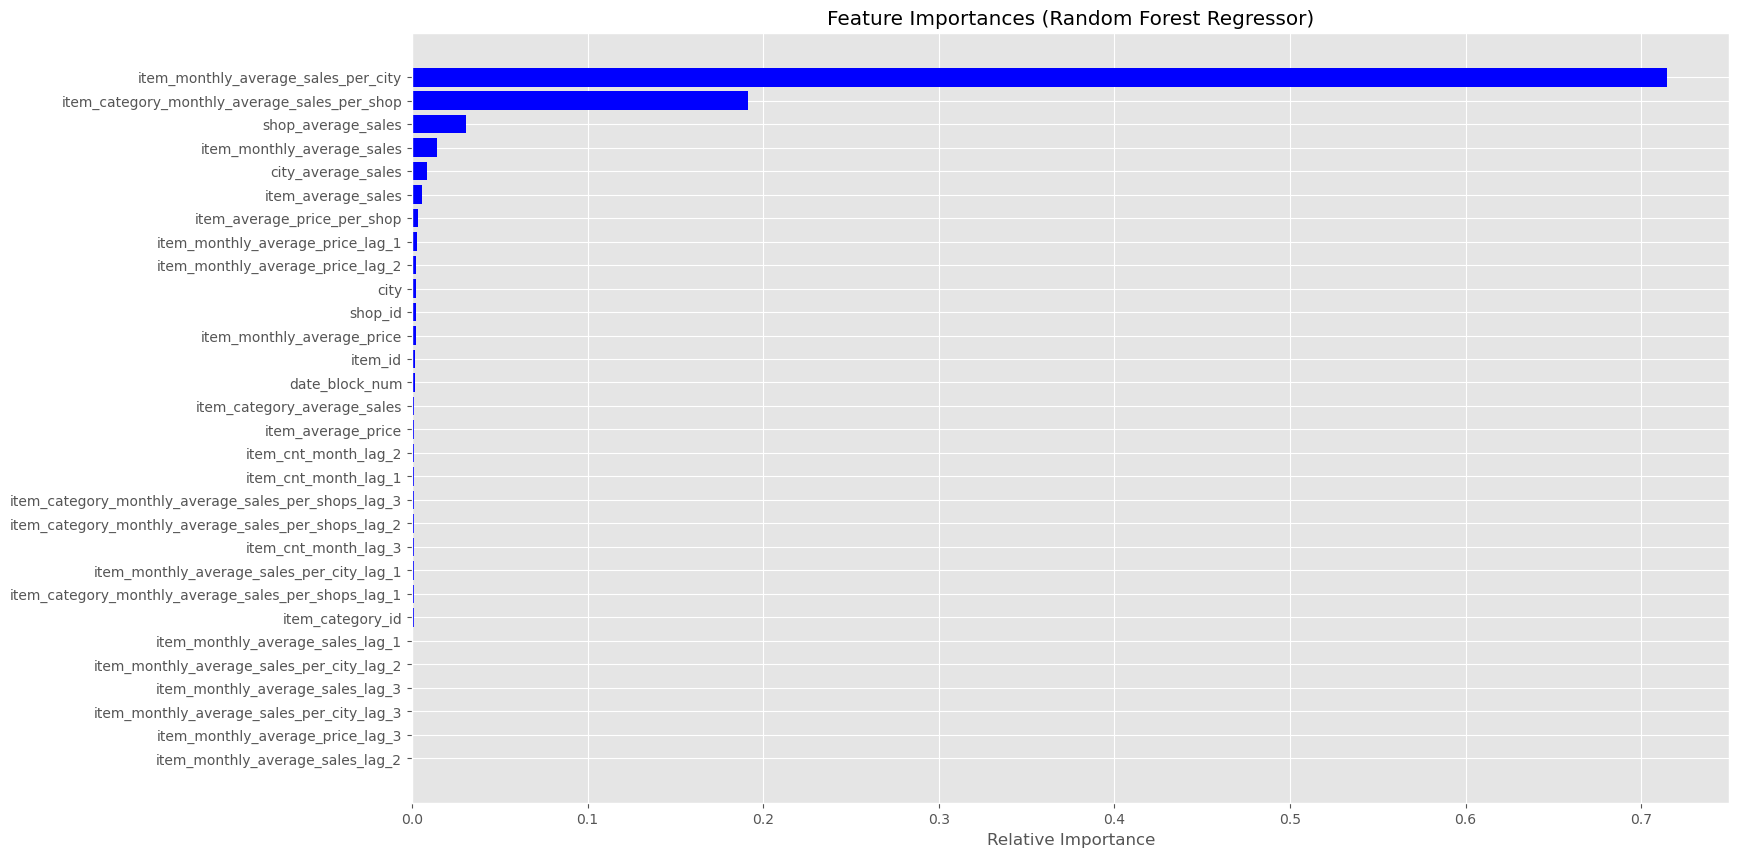

In [211]:
importances = regr.feature_importances_
index = np.argsort(importances)
feature_names = X_train.columns.to_list()
plt.figure(figsize=(17, 10))
plt.title('Feature Importances (Random Forest Regressor)')
plt.barh(range(len(index)), importances[index], color='b', align='center')
plt.yticks(range(len(index)), [feature_names[i] for i in index])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest Classifier: 

In [157]:
regc = RandomForestClassifier(n_jobs=-1, random_state=0)
regc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [158]:
regc_pred = regc.predict(X_valid)
rmse(y_valid, regc_pred)

1.448639298020363

## MLP Regressor:

In [164]:
np.random.seed(2022)
import warnings
warnings.filterwarnings("ignore")


mlp = MLPRegressor(random_state=0, early_stopping=True, tol=1e-2).fit(X_train, y_train)

In [165]:
mlp_pred = mlp.predict(X_valid)
rmse(y_valid, mlp_pred)

1.5929686201883957

RMSE after rounding prediction:

In [168]:
rmse(y_valid, np.round(mlp_pred))

1.6062629504991517

## MLP Classifier:

In [166]:
np.random.seed(2022)

mlp_c = MLPClassifier(random_state=0, early_stopping=True, tol=1e-2).fit(X_train, y_train)

In [167]:
mlp_c_pred = mlp_c.predict(X_valid)
rmse(y_valid, mlp_c_pred)

4.597779023506695

## LightGBM:

In [171]:
np.random.seed(2022)
features = X_train.columns.tolist()
categorical = ['item_id','item_category_id', 'city','shop_id']
params = {'objective': 'mse', 'metric': 'rmse', 'num_leaves': 100, 'learning_rate': 0.003,
          'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'bagging_freq': 5, 'seed': 2022,
          'verbose': 1, 'force_row_wise' : True}
train_lgb = lgb.Dataset(X_train, y_train, categorical_feature=None)
val_lgb  = lgb.Dataset(X_valid, y_valid, categorical_feature=None, reference=lgb_train)
evals_result = {}
gbm = lgb.train(params, train_lgb, num_boost_round = 5000, valid_sets = (train_lgb, val_lgb), 
                feature_name = features, categorical_feature = categorical, verbose_eval = 100, 
                evals_result = evals_result, early_stopping_rounds = 500)

[LightGBM] [Info] Total Bins 17110
[LightGBM] [Info] Number of data points in the train set: 1302139, number of used features: 30
[LightGBM] [Info] Start training from score 1.525948
Training until validation scores don't improve for 500 rounds
[100]	training's rmse: 5.27117	valid_1's rmse: 3.68987
[200]	training's rmse: 4.34697	valid_1's rmse: 2.8557
[300]	training's rmse: 3.69289	valid_1's rmse: 2.24915
[400]	training's rmse: 3.19233	valid_1's rmse: 1.78535
[500]	training's rmse: 2.8521	valid_1's rmse: 1.47343
[600]	training's rmse: 2.60104	valid_1's rmse: 1.27421
[700]	training's rmse: 2.42967	valid_1's rmse: 1.16449
[800]	training's rmse: 2.28851	valid_1's rmse: 1.11004
[900]	training's rmse: 2.18886	valid_1's rmse: 1.09615
[1000]	training's rmse: 2.11084	valid_1's rmse: 1.11259
[1100]	training's rmse: 2.05198	valid_1's rmse: 1.12537
[1200]	training's rmse: 2.00506	valid_1's rmse: 1.145
[1300]	training's rmse: 1.96477	valid_1's rmse: 1.16377
[1400]	training's rmse: 1.93415	valid_1'

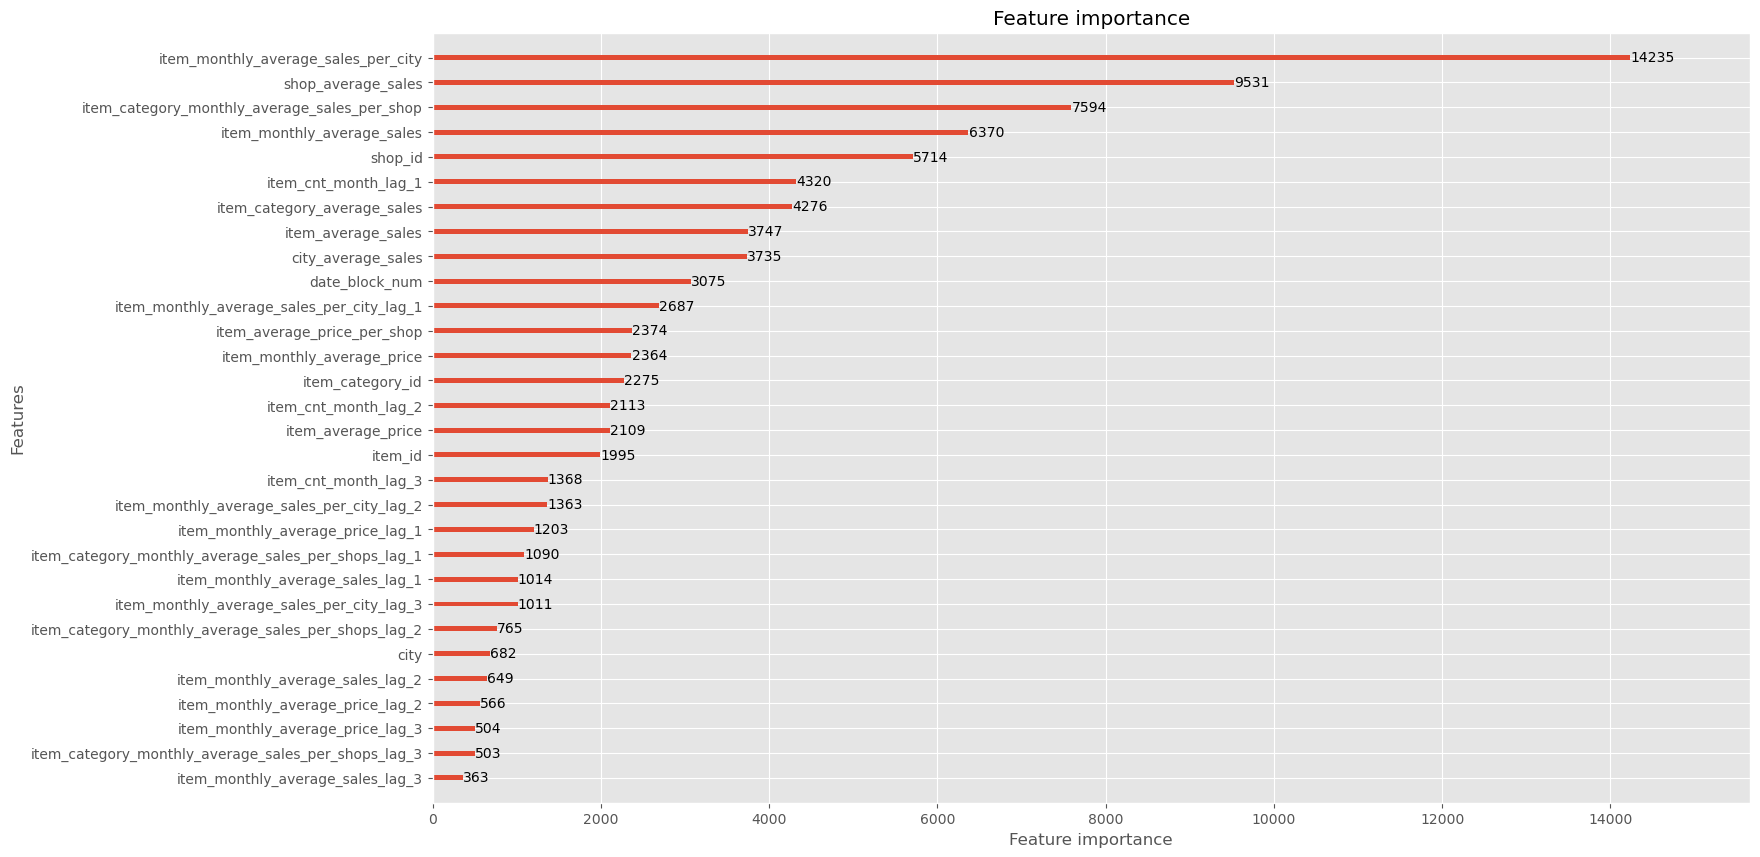

In [176]:
lgb.plot_importance(gbm, figsize=(17, 10));

Predict test dataset:

In [186]:
LightGBMpred = gbm.predict(X_test)
LightGBMpred = np.clip(pred, a_min=0, a_max=max(LightGBMpred))

In [187]:
write_test(LightGBMpred, X_test, sample_submission, "LightGBM.csv")

RMSE on Validation Dataset:

In [212]:
LightGBMpred_val = gbm.predict(X_valid)

In [213]:
rmse(y_valid, LightGBMpred_val)

1.0948513342732218

RMSE on Validation Dataset after rounding:

In [214]:
rmse(y_valid, np.around(LightGBMpred_val))

1.0979986761814309